#  Real Estate Price Prediction - Using  Linear Regression Techniques


In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1/ EDA

In [2]:
#Loading Data
data = pd.read_csv("house+price_train.csv")
test = pd.read_csv("houseprices_test.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Let's take a look at training first.

We can notice there is no saleprice feature in test data

In [4]:
# checking data types for variables in HousePrice dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We can observe so many missing values and object columns

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We can observe outliers in LotArea, MasVnrArea, MiscVal, ScreenPorch and in many other

In [6]:
# Checking data size
data.shape

(1460, 81)

In [7]:
# dataframe with categorical features
data.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables and count, unique, top, freq for categorical variables.

In [8]:
# dataframe with numerical features
data.describe(include=['int64'])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#Spliting Target Variable
target = data['SalePrice']
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


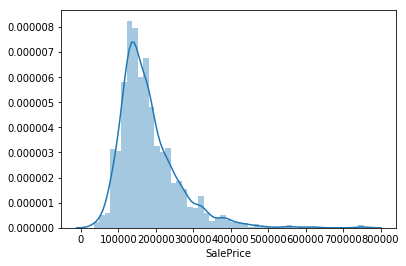

In [10]:
# Visualizing the distribution of Salesprice(Dependent) variable 
import seaborn as sns
sns.distplot(target,hist=True)

The distribution is left skewed, to make it normally distributed, we need to use log transformation.

In [11]:
# Log transformation
import numpy as np
target_log  = np.log(target)

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


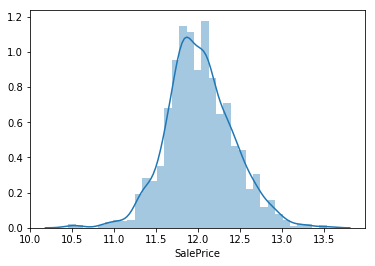

In [12]:
sns.distplot(target_log,hist=True)

import matplotlib
prices = pd.DataFrame({"Sale Price":data["SalePrice"],"Log Sale Price ":target_log})
prices.hist()

Now, target variable is normally distributed.

Text(0.5,1,'Correlation between features')

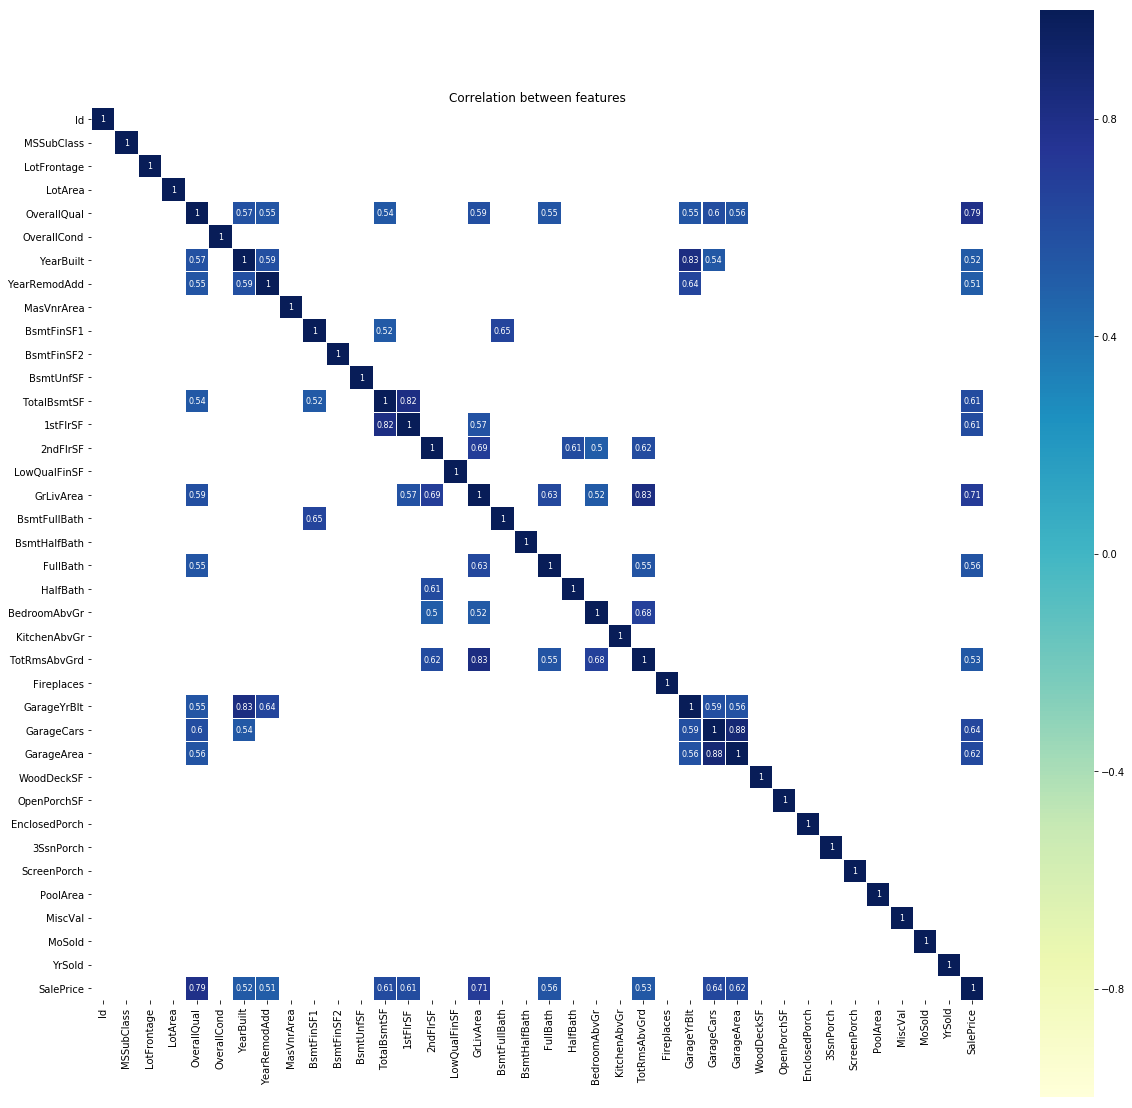

In [13]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=data.corr()
plt.figure(figsize=(20,20))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

OverallQual, Yrsold are more correlated to many other features

Yearbuilt, 2ndFlrSF, GrLivArea and Fireplaces also correlated with some other features

In [14]:
# Check Correlation
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


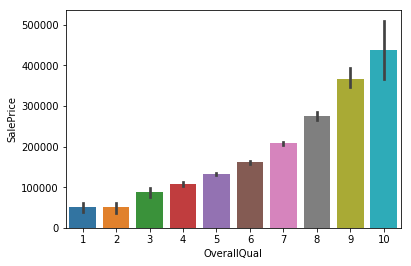

In [15]:
sns.barplot(data.OverallQual,data.SalePrice)

The Sales Price increases with the increase in Overall Quality.

In [16]:
# If fireplace is missing that means that house doesn't have a FireplaceQu
FireplaceQu = data["FireplaceQu"].fillna('None')
pd.crosstab(data.Fireplaces, data.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


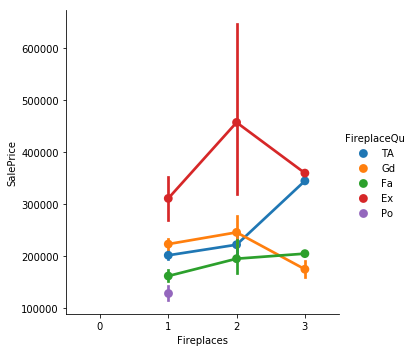

In [17]:
sns.factorplot("Fireplaces","SalePrice",data=data,hue="FireplaceQu");

If there are two fireplaces, the Sales Price increases.
Also, if there are fireplace of Excellent quality in the house the Sales Price increases.

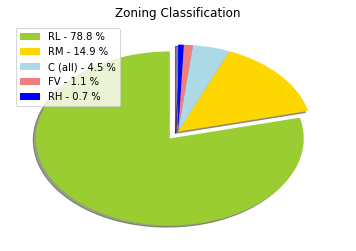

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


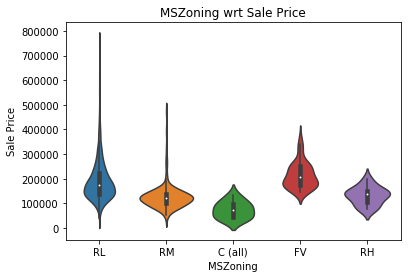

In [18]:
# MSZoning
labels = data["MSZoning"].unique()
sizes = data["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()

sns.violinplot(data.MSZoning,data["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");

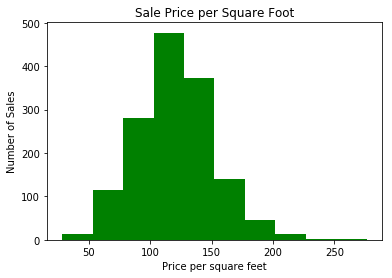

In [19]:
# SalePrice per Square Foot
SalePriceSF = data['SalePrice']/data['GrLivArea']
plt.hist(SalePriceSF, color="green")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

Most of the sales happend in 100 to 150 square feet

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


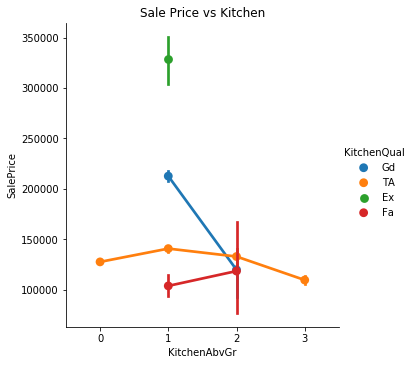

In [20]:
# Kitchen Quality
sns.factorplot("KitchenAbvGr","SalePrice",data=data,hue="KitchenQual")
plt.title("Sale Price vs Kitchen");

Having one Kitchen of Excellent quality hikes house price.

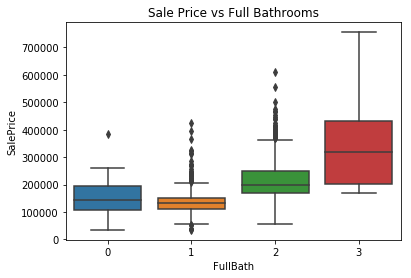

In [21]:
sns.boxplot(data["FullBath"],data["SalePrice"])
plt.title("Sale Price vs Full Bathrooms");

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


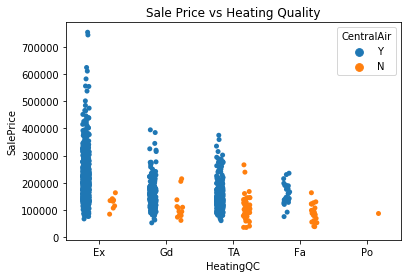

In [22]:
# Heating and AC arrangements
sns.stripplot(x="HeatingQC", y="SalePrice",data=data,hue='CentralAir',jitter=True,split=True)
plt.title("Sale Price vs Heating Quality");

Having AC hikes price of house.

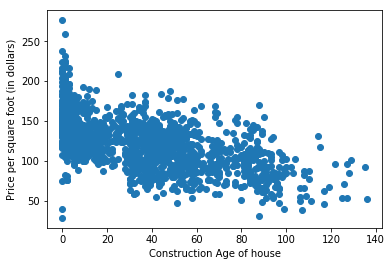

In [23]:
ConstructionAge = data['YrSold'] - data['YearBuilt']
plt.scatter(ConstructionAge, SalePriceSF)
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");

Price of house goes down with its age.

#### We also need to perform EDA for Test data for better results

#### So, lets just check for basic requirments

In [24]:
test.shape

(1459, 80)

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

Here also we find missing values and object features. We'll deal with these values while doing for train data

# 2/ Feature engineering

In [26]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [27]:
# Adding total sqfootage feature 
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
data = data.drop(["TotalBsmtSF"], axis=1)
data = data.drop(["1stFlrSF"], axis=1)
data = data.drop(["2ndFlrSF"], axis=1)
data = data.drop(["Id"], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343


Split dataframe into 2 with:

* categorical features
* numerical features

In [28]:
# save all categorical columns in list
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object']

# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)

In [29]:
# Using describe function in numeric dataframe 
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,5.844521,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,2567.048630
std,24.284752,9981.264932,1.382997,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,48.623081,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,821.714421
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,334.000000
25%,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,2009.500000
50%,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,2474.000000
75%,80.000000,11601.500000,7.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,3004.000000
max,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,572.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,11752.000000


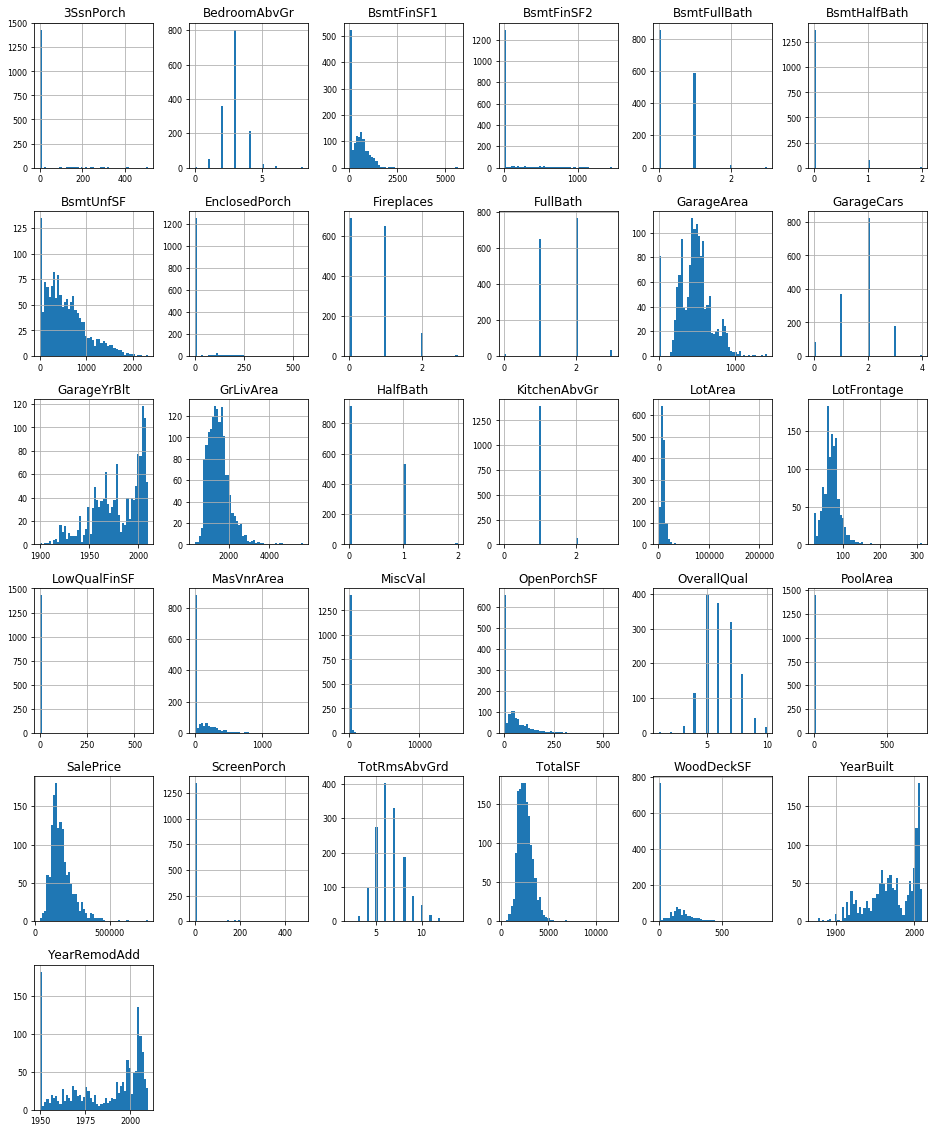

In [30]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [31]:
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
data_num_skew = data_num_skew[data_num_skew > .75]

# applying log + 1 transformation for all numeric features with skewnes over .75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


In [32]:
# Listing of variables has skewness more than 0.75
data_num_skew

LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
SalePrice         1.880941
TotalSF           1.774874
dtype: float64

In [33]:
#Mean Normalization
data_num = ((data_num - data_num.mean())/(data_num.max() - data_num.min()))
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF
count,1.201000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.452000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.494947e-15,4.984835e-16,1.946692e-17,2.267735e-16,1.541119e-15,-2.879545e-16,4.277020e-16,1.277517e-17,5.977049e-16,-2.756072e-17,...,-6.957905e-18,4.643166e-16,-4.462564e-16,6.616663e-17,-1.454791e-17,1.127333e-17,-7.648467e-17,2.399622e-17,1.103974e-14,-1.981462e-15
std,1.302418e-01,1.012732e-01,1.536663e-01,2.188616e-01,3.440901e-01,3.566180e-01,3.463615e-01,2.528701e-01,2.390241e-01,1.176771e-01,...,1.507792e-01,3.843948e-01,3.413088e-01,2.735105e-01,1.070007e-01,2.272059e-01,6.641407e-02,1.270673e-01,1.299359e-01,8.809425e-02
min,-4.198342e-01,-3.797634e-01,-5.665906e-01,-7.193319e-01,-5.810959e-01,-2.889448e-01,-4.896358e-01,-8.982469e-02,-7.282006e-01,-1.571654e-02,...,-3.335544e-01,-3.637825e-01,-3.660704e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,-5.086802e-01,-5.589950e-01
25%,-4.241893e-02,-3.544346e-02,-1.221461e-01,-1.251290e-01,-2.977626e-01,-2.889448e-01,-4.896358e-01,-8.982469e-02,-3.051994e-02,-1.571654e-02,...,-9.765877e-02,-3.637825e-01,-3.660704e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,-8.098109e-02,-5.530119e-02
50%,1.556841e-02,8.988780e-03,-1.103501e-02,1.255211e-02,1.522374e-01,-2.889448e-01,1.993641e-01,-8.982469e-02,6.733259e-02,-1.571654e-02,...,4.950538e-03,-3.637825e-01,1.505731e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,-7.333860e-03,3.122795e-03
75%,7.047235e-02,4.854699e-02,1.000761e-01,2.082043e-01,3.189041e-01,4.047022e-01,2.708912e-01,-8.982469e-02,1.350357e-01,-1.571654e-02,...,7.265153e-02,3.956845e-01,3.053412e-01,-1.105272e-01,-1.374717e-02,-6.649616e-02,-4.607065e-03,-2.419569e-02,8.121732e-02,5.766237e-02
max,5.801658e-01,6.202366e-01,4.334094e-01,2.806681e-01,4.189041e-01,7.110552e-01,5.103642e-01,9.101753e-01,2.717994e-01,9.842835e-01,...,6.664456e-01,6.362175e-01,6.339296e-01,8.894728e-01,9.862528e-01,9.335038e-01,9.953929e-01,9.758043e-01,4.913198e-01,4.410050e-01


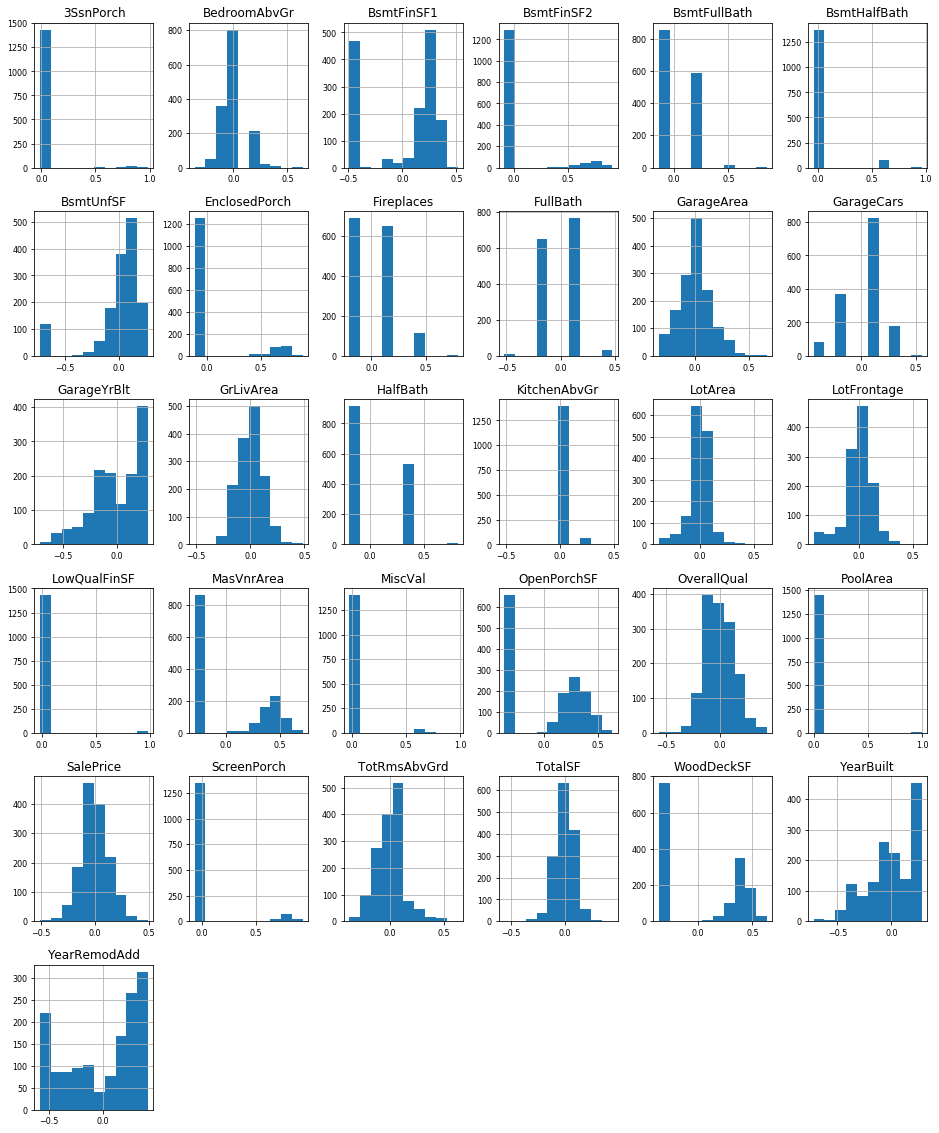

In [34]:
data_num.hist(figsize=(16, 20),xlabelsize=8, ylabelsize=8);

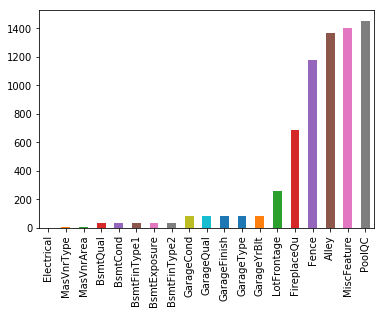

In [35]:
# Dealing Missing Data

# first we'll visualize null count in overall dataframe
null_in_HousePrice = data.isnull().sum()
null_in_HousePrice = null_in_HousePrice[null_in_HousePrice > 0]
null_in_HousePrice.sort_values(inplace=True)
null_in_HousePrice.plot.bar()

In [36]:
# Printing total numbers and percentage of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [37]:
# Numerical Columns
data_len = data_num.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 260:
        #print("droping column: {}".format(col))
        data_num = data_num.drop(col, axis = 1)
    # if there is less than 260 missing values than fill in with median valu of column
    else:
        #print("filling missing values with median in column: {}".format(col))
        data_num = data_num.fillna(data_num[col].median())

In [38]:
# Categorical Columns
data_len = data_cat.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 50:
        print("droping column: {}".format(col))
        data_cat.drop(col, axis = 1)
    # if there is less than 50 missing values than fill in with median valu of column
    else:
        #print("filling missing values with XXX: {}".format(col))
        #data_cat = data_cat.fillna('XXX')
        pass

droping column: Alley
droping column: FireplaceQu
droping column: GarageType
droping column: GarageFinish
droping column: GarageQual
droping column: GarageCond
droping column: PoolQC
droping column: Fence
droping column: MiscFeature


In [39]:
data_cat.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,1379,1379,1460,7,281,54,1460,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,5,5,3,3,4,4,12,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Gd,MnPrv,Shed,6,2009,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,1311,1326,1340,3,157,49,253,338,1267,1198


In [40]:
# Dummy Coding for Categorical Variables

# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [41]:
print("Numerical features : " + str(len(data_num.columns)))
print("Categorical features : " + str(len(data_cat_dummies.columns)))

Numerical features : 31
Categorical features : 246


In [42]:
# using concat function we merging two dataframe for furthere analysis
newdata = pd.concat([data_num, data_cat_dummies], axis=1)

In [43]:
newdata.shape

(1460, 277)

# 3/ create a model basis train data

In [44]:
#Let us now split the train into train & validate i.e test 
#for best optimisation i.e normalizing before applying it to test data

from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(newdata, target_log, test_size = 0.30, random_state=0)
print("x_train ",x_train.shape)
print("x_test ",x_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (1022, 277)
x_test  (438, 277)
y_train  (1022,)
y_test  (438,)


In [45]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model1 = sm.OLS(y_train, x_train).fit()
# Note the Swap of X and Y 

In [46]:
# Printing Linear Regression Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.659e+12
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        12:23:26   Log-Likelihood:                 13324.
No. Observations:                1022   AIC:                        -2.612e+04
Df Residuals:                     756   BIC:                        -2.480e+04
Df Model:                         265                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage            6.003e-07   3.31e-07      1.814      0.070   -4.93e-08    1.25e-06
LotArea               -2.027e-06   5.24e-07     -3.873      0.000   -3.06e-06      -1e-06
OverallQual           -6.066e-07    3.3e-07     -1.841      0.066   -1.25e-06    4.03e-08
YearBuilt             -4.446e-07   4.24e-07     -1.049      0.294   -1.28e-06    3.87e-07
YearRemodAdd          -4.775e-08   1.21e-07     -0.394      0.694   -2.86e-07     1.9e-07
MasVnrArea            -6.403e-07   3.04e-07     -2.104      0.036   -1.24e-06    -4.3e-08
BsmtFinSF1            -3.466e-07   3.31e-07     -1.048      0.295   -9.96e-07    3.03e-07
BsmtFinSF2            -3.367e-07   4.93e-07     -0.683      0.495    -1.3e-06    6.31e-07
BsmtUnfSF              8.791e-08   1.66e-07      0.530      0.596   -2.38e-07    4.14e-07
LowQualFinSF           4.761e-07   2.56e-07      1.861      0.063   -2.62e-08    9.78e-07
GrLivArea              9.733e-07   1.16e-06      0.838      0.402   -1.31e-06    3.25e-06
BsmtFullBath            3.48e-08   1.98e-07      0.175      0.861   -3.55e-07    4.24e-07
BsmtHalfBath           8.711e-08   1.72e-07      0.507      0.612    -2.5e-07    4.24e-07
FullBath              -6.008e-07   2.32e-07     -2.585      0.010   -1.06e-06   -1.45e-07
HalfBath               5.221e-08   1.55e-07      0.336      0.737   -2.53e-07    3.57e-07
BedroomAbvGr           7.265e-07   3.97e-07      1.832      0.067   -5.22e-08    1.51e-06
KitchenAbvGr           1.104e-06   7.42e-07      1.488      0.137   -3.52e-07    2.56e-06
TotRmsAbvGrd          -1.472e-06   3.81e-07     -3.859      0.000   -2.22e-06   -7.23e-07
Fireplaces              -6.1e-07   2.34e-07     -2.610      0.009   -1.07e-06   -1.51e-07
GarageYrBlt            2.717e-07   2.42e-07      1.122      0.262   -2.04e-07    7.47e-07
GarageCars            -8.462e-08   3.32e-07     -0.255      0.799   -7.35e-07    5.66e-07
GarageArea             -6.59e-07   4.07e-07     -1.617      0.106   -1.46e-06    1.41e-07
WoodDeckSF            -1.489e-08    6.7e-08     -0.222      0.824   -1.46e-07    1.17e-07
OpenPorchSF           -1.535e-07   8.15e-08     -1.884      0.060   -3.13e-07    6.43e-09
EnclosedPorch          2.038e-08   9.86e-08      0.207      0.836   -1.73e-07    2.14e-07
3SsnPorch             -9.538e-08   2.17e-07     -0.440      0.660   -5.21e-07     3.3e-07
ScreenPorch            1.081e-07      1e-07      1.079      0.281   -8.85e-08    3.05e-07
PoolArea               1.099e-06   1.06e-06      1.041      0.298   -9.74e-07    3.17e-06
MiscVal               -7.966e-07   5.88e-07     -1.354      0.176   -1.95e-06    3.59e-07
SalePrice                 3.0742   7.18e-07   4.28e+06      0.000       3.074       3.074
TotalSF               -6.652e-07    1.4e-06     -0.476      0.634   -3.41e-06    2.08e-06
MSSubClass_160        -

In [47]:
def rmse(predictions, targets):

    differences = predictions - targets                       # the DIFFERENCEs.

    differences_squared = differences ** 2                    # the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  # the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           # ROOT of ^

    return rmse_val 

In [48]:
cols = ['Model', 'R-Squared Value', 'Adj.R-Squared Value', 'RMSE']
models_report = pd.DataFrame(columns = cols)
# Predicting the model on test data
predictions1 = model1.predict(x_test)

In [49]:

tmp1 = pd.Series({'Model': " Base Linear Regression Model",
                 'R-Squared Value' : model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                 'RMSE': rmse(predictions1, y_test)})

model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Base Linear Regression Model,1.0,1.0,0.507819


In [50]:
# Constant Model 
df_constant = sm.add_constant(newdata)

In [51]:
df_constant.shape

(1460, 278)

In [52]:
x_train1,x_test1, y_train1, y_test1 = train_test_split(df_constant, target_log, test_size = 0.30, random_state=0)

In [53]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model2 = sm.OLS(y_train1, x_train1).fit()
# Note the Swap of X and Y 

In [54]:
# Printing Linear Regression Summary
model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                OLS                Adj. R-squared:       1.000      
Dependent Variable:   SalePrice          AIC:                  -26115.7147
Date:                 2019-01-09 12:23   BIC:                  -24804.4632
No. Observations:     1022               Log-Likelihood:       13324.     
Df Model:             265                F-statistic:          1.659e+12  
Df Residuals:         756                Prob (F-statistic):   0.00       
R-squared:            1.000              Scale:                3.7551e-13 
--------------------------------------------------------------------------
                       Coef.  Std.Err.      t       P>|t|   [0.025  0.975]
--------------------------------------------------------------------------
const                  9.4927   0.0000 7218744.1890 0.0000  9.4927  9.4927
LotFrontage            0.0000   0.0000       1.8141 0.0701 -0.0000  0.0000
LotArea               -0.0000   0.0000      -3.8725 0.0001 -0.0000 -0.0000
OverallQual           -0.0000   0.0000      -1.8409 0.0660 -0.0000  0.0000
YearBuilt             -0.0000   0.0000      -1.0491 0.2945 -0.0000  0.0000
YearRemodAdd          -0.0000   0.0000      -0.3935 0.6940 -0.0000  0.0000
MasVnrArea            -0.0000   0.0000      -2.1043 0.0357 -0.0000 -0.0000
BsmtFinSF1            -0.0000   0.0000      -1.0476 0.2952 -0.0000  0.0000
BsmtFinSF2            -0.0000   0.0000      -0.6832 0.4947 -0.0000  0.0000
BsmtUnfSF              0.0000   0.0000       0.5300 0.5963 -0.0000  0.0000
LowQualFinSF           0.0000   0.0000       1.8606 0.0632 -0.0000  0.0000
GrLivArea              0.0000   0.0000       0.8378 0.4024 -0.0000  0.0000
BsmtFullBath           0.0000   0.0000       0.1753 0.8609 -0.0000  0.0000
BsmtHalfBath           0.0000   0.0000       0.5074 0.6121 -0.0000  0.0000
FullBath              -0.0000   0.0000      -2.5855 0.0099 -0.0000 -0.0000
HalfBath               0.0000   0.0000       0.3359 0.7371 -0.0000  0.0000
BedroomAbvGr           0.0000   0.0000       1.8316 0.0674 -0.0000  0.0000
KitchenAbvGr           0.0000   0.0000       1.4879 0.1372 -0.0000  0.0000
TotRmsAbvGrd          -0.0000   0.0000      -3.8593 0.0001 -0.0000 -0.0000
Fireplaces            -0.0000   0.0000      -2.6097 0.0092 -0.0000 -0.0000
GarageYrBlt            0.0000   0.0000       1.1217 0.2623 -0.0000  0.0000
GarageCars            -0.0000   0.0000      -0.2552 0.7986 -0.0000  0.0000
GarageArea            -0.0000   0.0000      -1.6175 0.1062 -0.0000  0.0000
WoodDeckSF            -0.0000   0.0000      -0.2222 0.8242 -0.0000  0.0000
OpenPorchSF           -0.0000   0.0000      -1.8841 0.0599 -0.0000  0.0000
EnclosedPorch          0.0000   0.0000       0.2067 0.8363 -0.0000  0.0000
3SsnPorch             -0.0000   0.0000      -0.4403 0.6599 -0.0000  0.0000
ScreenPorch            0.0000   0.0000       1.0794 0.2808 -0.0000  0.0000
PoolArea               0.0000   0.0000       1.0408 0.2983 -0.0000  0.0000
MiscVal               -0.0000   0.0000      -1.3538 0.1762 -0.0000  0.0000
SalePrice              3.0742   0.0000 4281030.3534 0.0000  3.0742  3.0742
TotalSF               -0.0000   0.0000      -0.4758 0.6343 -0.0000  0.0000
MSSubClass_160        -0.0000   0.0000      -1.7410 0.0821 -0.0000  0.0000
MSSubClass_180         0.0000   0.0000       1.0465 0.2957 -0.0000  0.0000
MSSubClass_190        -0.0000   0.0000      -1.0601 0.2894 -0.0000  0.0000
MSSubClass_20          0.0000   0.0000       0.8248 0.4097 -0.0000  0.0000
MSSubClass_30          0.0000   0.0000       0.1881 0.8508 -0.0000  0.0000
MSSubClass_40          0.0000   0.0000       0.5592 0.5762 -0.0000  0.0000
MSSubClass_45         -0.0000   0.0000      -2.5413 0.0112 -0.0000 -0.0000
MSSubClass_50          0.0000   0.0000       0.9480 0.3434 -0.0000  0.0000
MSSubClass_60         -0.0000   0.0000      -0.0620 0.9506 -0.0000  0.000

In [55]:
# Predicting the model on test data
predictions2 = model2.predict(x_test1)

tmp2 = pd.Series({'Model': " Linear Regression Model with Constant",
                 'R-Squared Value' : model2.rsquared,
                 'Adj.R-Squared Value': model2.rsquared_adj,
                 'RMSE': rmse(predictions2, y_test1)})

model2_report = models_report.append(tmp2, ignore_index = True)
model2_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,Linear Regression Model with Constant,1.0,1.0,0.106909


#### Checking Multicollinearity

In [56]:
#Calculating Variance Inflation Factor(VIF)

print ("\nVariance Inflation Factor")
cnames = x_train1.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train1[yvar],(x_train1[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))



Variance Inflation Factor
const 0.0
LotFrontage 3.928


C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


LotArea 7.519
OverallQual 6.721
YearBuilt 23.451
YearRemodAdd 4.676
MasVnrArea 31.886
BsmtFinSF1 35.741
BsmtFinSF2 43.937
BsmtUnfSF 4.095
LowQualFinSF 2.479
GrLivArea 50.866
BsmtFullBath 3.156
BsmtHalfBath 1.727
FullBath 4.786
HalfBath 4.077
BedroomAbvGr 4.311
KitchenAbvGr 6.243
TotRmsAbvGrd 7.167
Fireplaces 6.67
GarageYrBlt 7.798
GarageCars 10.066
GarageArea 9.786
WoodDeckSF 1.817
OpenPorchSF 2.119
EnclosedPorch 2.075
3SsnPorch 1.451
ScreenPorch 1.47
PoolArea 8.349
MiscVal 18.022
SalePrice 23.992
TotalSF 39.954
MSSubClass_160 17.007
MSSubClass_180 2.723
MSSubClass_190 53.724
MSSubClass_20 119.932
MSSubClass_30 25.578
MSSubClass_40 4.661
MSSubClass_45 36.683
MSSubClass_50 75.573
MSSubClass_60 129.96
MSSubClass_70 33.827
MSSubClass_75 13.918
MSSubClass_80 39.351
MSSubClass_85 12.157
MSSubClass_90 inf
MSZoning_FV 18.505
MSZoning_RH 6.281


C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


MSZoning_RL 59.537
MSZoning_RM 39.208
Street_Pave 2.087
Alley_Pave 2.564
LotShape_IR2 1.538
LotShape_IR3 1.545
LotShape_Reg 1.889
LandContour_HLS 2.817
LandContour_Low 3.662
LandContour_Lvl 4.558
Utilities_NoSeWa 2.092
LotConfig_CulDSac 2.134
LotConfig_FR2 1.466
LotConfig_FR3 2.51
LotConfig_Inside 2.074
LandSlope_Mod 2.351
LandSlope_Sev 3.159
Neighborhood_Blueste 1.863
Neighborhood_BrDale 4.657
Neighborhood_BrkSide 12.874
Neighborhood_ClearCr 6.778
Neighborhood_CollgCr 17.975
Neighborhood_Crawfor 9.44
Neighborhood_Edwards 15.775
Neighborhood_Gilbert 10.531
Neighborhood_IDOTRR 10.422
Neighborhood_MeadowV 5.581
Neighborhood_Mitchel 8.766
Neighborhood_NAmes 29.454
Neighborhood_NPkVill 3.423
Neighborhood_NWAmes 11.431
Neighborhood_NoRidge 6.939
Neighborhood_NridgHt 9.968
Neighborhood_OldTown 23.5
Neighborhood_SWISU 5.73
Neighborhood_Sawyer 13.668
Neighborhood_SawyerW 9.361
Neighborhood_Somerst 13.884
Neighborhood_StoneBr 3.953
Neighborhood_Timber 6.722
Neighborhood_Veenker 2.402
Condition1

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Condition2_PosA nan
Condition2_PosN 3.667
Condition2_RRAe 7.588
Condition2_RRAn nan
Condition2_RRNn nan
BldgType_2fmCon 40.418
BldgType_Duplex inf
BldgType_Twnhs 16.383
BldgType_TwnhsE 37.703
HouseStyle_1.5Unf 35.769
HouseStyle_1Story 80.232
HouseStyle_2.5Fin 4.486
HouseStyle_2.5Unf 7.013
HouseStyle_2Story 54.779
HouseStyle_SFoyer 12.377
HouseStyle_SLvl 25.805
OverallCond_2 inf
OverallCond_3 inf
OverallCond_4 inf
OverallCond_5 inf
OverallCond_6 inf
OverallCond_7 inf
OverallCond_8 inf
OverallCond_9 inf
RoofStyle_Gable 134.765
RoofStyle_Gambrel 7.834
RoofStyle_Hip 124.428
RoofStyle_Mansard 6.39
RoofStyle_Shed 7.219
RoofMatl_CompShg inf
RoofMatl_Membran nan
RoofMatl_Metal inf
RoofMatl_Roll inf
RoofMatl_Tar&Grv inf
RoofMatl_WdShake inf
RoofMatl_WdShngl inf
Exterior1st_AsphShn inf
Exterior1st_BrkComm 2.963
Exterior1st_BrkFace 21.483
Exterior1st_CBlock inf
Exterior1st_CemntBd 47.491
Exterior1st_HdBoard 84.622
Exterior1st_ImStucc 1.894
Exterior1st_MetalSd 111.595
Exterior1st_Plywood 51.074
Ex

# 4/ Iterate and find the best regression model

In [57]:
#Removing variable has  threshold value of VIF above 100 

vif_100 = ['MSSubClass_20','MSSubClass_60','RoofStyle_Gable','RoofStyle_Hip','RoofMatl_CompShg','Exterior1st_MetalSd','Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageQual_TA','GarageCond_TA']
# custom function to remove variables having higer VIF

to_keep = [x for x in x_train1 if x not in vif_100]
# print(to_keep)
x_train2 = x_train1[to_keep]
x_train2.head()

,const,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
64,1.0,0.015568,0.006840,0.100076,0.186465,0.218904,0.572034,0.275153,-0.089825,0.015060,...,0,0,0,0,1,0,0,0,1,0
682,1.0,0.015568,-0.223669,-0.011035,0.179219,0.202237,-0.288945,0.310472,-0.089825,0.002327,...,0,0,0,0,1,0,0,0,1,0
960,1.0,-0.103554,-0.044634,-0.122146,-0.096144,0.385571,-0.288945,0.268223,-0.089825,-0.071504,...,0,0,0,0,1,0,0,0,1,0
1384,1.0,-0.036201,0.000150,-0.011035,-0.233825,-0.581096,-0.288945,0.126559,-0.089825,0.029569,...,0,0,0,0,1,0,0,0,1,0
1100,1.0,-0.036201,-0.014654,-0.455479,-0.371506,-0.581096,-0.288945,0.167111,-0.089825,-0.728201,...,0,0,0,0,1,0,0,0,1,0


In [58]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model3 = sm.OLS(y_train1,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.710e+12
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        12:23:44   Log-Likelihood:                 13316.
No. Observations:                1022   AIC:                        -2.612e+04
Df Residuals:                     765   BIC:                        -2.485e+04
Df Model:                         256                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.9310   1.36e-06   8.04e+06      0.000      10.931      10.931
LotFrontage            5.614e-07   3.29e-07      1.706      0.088   -8.46e-08    1.21e-06
LotArea               -1.884e-06      5e-07     -3.766      0.000   -2.87e-06   -9.02e-07
OverallQual            -5.62e-07   3.26e-07     -1.722      0.085    -1.2e-06    7.85e-08
YearBuilt             -4.676e-07   4.17e-07     -1.120      0.263   -1.29e-06    3.52e-07
YearRemodAdd          -3.776e-09   1.19e-07     -0.032      0.975   -2.38e-07    2.31e-07
MasVnrArea            -6.739e-07   3.03e-07     -2.226      0.026   -1.27e-06   -7.96e-08
BsmtFinSF1            -3.699e-07   3.29e-07     -1.123      0.262   -1.02e-06    2.77e-07
BsmtFinSF2             -3.38e-07   4.88e-07     -0.692      0.489    -1.3e-06    6.21e-07
BsmtUnfSF              1.034e-07   1.66e-07      0.625      0.532   -2.22e-07    4.29e-07
LowQualFinSF           4.073e-07   2.54e-07      1.602      0.110   -9.18e-08    9.06e-07
GrLivArea              9.402e-07   1.16e-06      0.813      0.416   -1.33e-06    3.21e-06
BsmtFullBath           3.103e-08   1.97e-07      0.157      0.875   -3.56e-07    4.18e-07
BsmtHalfBath           1.262e-07   1.71e-07      0.739      0.460   -2.09e-07    4.61e-07
FullBath              -5.508e-07   2.32e-07     -2.378      0.018   -1.01e-06   -9.61e-08
HalfBath               4.975e-08   1.52e-07      0.327      0.744   -2.49e-07    3.49e-07
BedroomAbvGr           7.541e-07   3.94e-07      1.912      0.056   -2.01e-08    1.53e-06
KitchenAbvGr           1.199e-06    7.2e-07      1.665      0.096   -2.14e-07    2.61e-06
TotRmsAbvGrd          -1.568e-06   3.79e-07     -4.134      0.000   -2.31e-06   -8.23e-07
Fireplaces            -5.804e-07   2.32e-07     -2.499      0.013   -1.04e-06   -1.24e-07
GarageYrBlt             1.19e-07   2.34e-07      0.508      0.612   -3.41e-07    5.79e-07
GarageCars             -3.72e-08   3.28e-07     -0.113      0.910   -6.82e-07    6.07e-07
GarageArea            -4.302e-07   3.95e-07     -1.089      0.276   -1.21e-06    3.45e-07
WoodDeckSF             9.727e-09   6.66e-08      0.146      0.884   -1.21e-07     1.4e-07
OpenPorchSF            -1.51e-07   8.08e-08     -1.869      0.062   -3.09e-07    7.58e-09
EnclosedPorch         -4.563e-09   9.77e-08     -0.047      0.963   -1.96e-07    1.87e-07
3SsnPorch             -5.413e-08   2.16e-07     -0.251      0.802   -4.78e-07     3.7e-07
ScreenPorch            7.917e-08    9.9e-08      0.799      0.424   -1.15e-07    2.74e-07
PoolArea               1.485e-06   1.03e-06      1.437      0.151   -5.44e-07    3.52e-06
MiscVal               -7.572e-07   5.87e-07     -1.291      0.197   -1.91e-06    3.95e-07
SalePrice                 3.0742   7.12e-07   4.32e+06      0.000       3.074       3.074
TotalSF               -

In [59]:
vif_100 = ['MSSubClass_20','MSSubClass_60','RoofStyle_Gable','RoofStyle_Hip','RoofMatl_CompShg','Exterior1st_MetalSd','Exterior1st_VinylSd','Exterior2nd_VinylSd','GarageQual_TA','GarageCond_TA']
# custom function to remove variables having higer VIF

to_keep = [x for x in x_test1 if x not in vif_100]
# print(to_keep)
x_test2 = x_test1[to_keep]
x_test2.head()

,const,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
529,1.0,0.015568,0.251185,-0.011035,-0.103390,-0.164429,0.015568,0.333029,-0.089825,0.136304,...,0,0,0,0,1,0,1,0,0,0
491,1.0,0.065799,0.009226,-0.011035,-0.219332,-0.581096,-0.288945,0.205091,0.610792,-0.022164,...,0,0,0,0,1,0,0,0,1,0
459,1.0,0.015568,-0.049919,-0.122146,-0.154115,-0.581096,0.400582,0.115299,-0.089825,0.079290,...,0,0,0,0,1,0,0,0,1,0
279,1.0,0.084153,0.019570,0.100076,0.041538,-0.131096,0.484095,0.201895,-0.089825,0.128498,...,0,0,0,0,1,0,0,0,1,0
655,1.0,-0.419834,-0.329602,-0.011035,-0.001941,-0.231096,0.516844,-0.489636,-0.089825,0.079535,...,0,0,0,0,1,0,0,1,0,0


In [60]:
predictions3 = model3.predict(x_test2)

tmp3 = pd.Series({'Model': " LRM after removing VIF above 100",
                 'R-Squared Value' : model3.rsquared,
                 'Adj.R-Squared Value': model3.rsquared_adj,
                 'RMSE': rmse(predictions3, y_test1)})

model3_report = models_report.append(tmp3, ignore_index = True)
model3_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 100,1.0,1.0,9.507658e-07


In [61]:
# Removing variable has threshold value of VIF above 10
print ("\nVariance Inflation Factor")
cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
const 0.0
LotFrontage 3.868
LotArea

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


 6.837
OverallQual 6.561
YearBuilt 22.654
YearRemodAdd 4.506
MasVnrArea 31.421
BsmtFinSF1 35.276
BsmtFinSF2 42.975
BsmtUnfSF 4.065
LowQualFinSF 2.437
GrLivArea 50.161
BsmtFullBath 3.107
BsmtHalfBath 1.702
FullBath 4.736
HalfBath 3.897
BedroomAbvGr 4.244
KitchenAbvGr 5.854
TotRmsAbvGrd 7.056
Fireplaces 6.557
GarageYrBlt 7.276
GarageCars 9.831
GarageArea 9.153
WoodDeckSF 1.786
OpenPorchSF 2.074
EnclosedPorch 2.028
3SsnPorch 1.436
ScreenPorch 1.433
PoolArea 7.969
MiscVal 17.843
SalePrice 23.477
TotalSF 39.729
MSSubClass_160 5.918
MSSubClass_180 2.652
MSSubClass_190 41.504
MSSubClass_30 3.365
MSSubClass_40 3.165
MSSubClass_45 30.538
MSSubClass_50 22.2
MSSubClass_70 4.192
MSSubClass_75 7.39
MSSubClass_80 19.292
MSSubClass_85 5.625
MSSubClass_90 inf


C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


MSZoning_FV 18.181
MSZoning_RH 6.116
MSZoning_RL 58.495
MSZoning_RM 38.496
Street_Pave 2.005
Alley_Pave 2.544
LotShape_IR2 1.486
LotShape_IR3 1.537
LotShape_Reg 1.87
LandContour_HLS 2.754
LandContour_Low 3.482
LandContour_Lvl 4.458
Utilities_NoSeWa 2.015
LotConfig_CulDSac 2.096
LotConfig_FR2 1.452
LotConfig_FR3 2.484
LotConfig_Inside 2.012
LandSlope_Mod 2.32
LandSlope_Sev 3.127
Neighborhood_Blueste 1.856
Neighborhood_BrDale 4.629
Neighborhood_BrkSide 12.74
Neighborhood_ClearCr 6.39
Neighborhood_CollgCr 17.848
Neighborhood_Crawfor 9.315
Neighborhood_Edwards 15.571
Neighborhood_Gilbert 10.451
Neighborhood_IDOTRR 10.278
Neighborhood_MeadowV 5.509
Neighborhood_Mitchel 8.657
Neighborhood_NAmes 29.132
Neighborhood_NPkVill 3.401
Neighborhood_NWAmes 11.331
Neighborhood_NoRidge 6.903
Neighborhood_NridgHt 9.834
Neighborhood_OldTown 23.263
Neighborhood_SWISU 5.709
Neighborhood_Sawyer 13.573
Neighborhood_SawyerW 9.268
Neighborhood_Somerst 13.715
Neighborhood_StoneBr 3.876
Neighborhood_Timber 6.649

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Condition2_PosA nan
Condition2_PosN 3.546
Condition2_RRAe 7.495
Condition2_RRAn nan
Condition2_RRNn nan
BldgType_2fmCon 40.036
BldgType_Duplex inf
BldgType_Twnhs 3.913
BldgType_TwnhsE 4.049
HouseStyle_1.5Unf 33.043
HouseStyle_1Story 56.369
HouseStyle_2.5Fin 4.324
HouseStyle_2.5Unf 6.589
HouseStyle_2Story 48.066
HouseStyle_SFoyer 10.97
HouseStyle_SLvl 25.236
OverallCond_2 inf
OverallCond_3 inf
OverallCond_4 inf
OverallCond_5 inf
OverallCond_6 inf
OverallCond_7 inf
OverallCond_8 inf
OverallCond_9 inf
RoofStyle_Gambrel 1.853
RoofStyle_Mansard 1.823
RoofStyle_Shed 5.79
RoofMatl_Membran nan
RoofMatl_Metal 1.566
RoofMatl_Roll 1.307
RoofMatl_Tar&Grv 1.886
RoofMatl_WdShake 2.498
RoofMatl_WdShngl 1.385
Exterior1st_AsphShn inf
Exterior1st_BrkComm 2.469
Exterior1st_BrkFace 6.076
Exterior1st_CBlock inf
Exterior1st_CemntBd 30.002
Exterior1st_HdBoard 17.441
Exterior1st_ImStucc 1.398
Exterior1st_Plywood 10.406
Exterior1st_Stone 2.24
Exterior1st_Stucco 5.655
Exterior1st_Wd Sdng 13.515
Exterior1st_WdSh

In [62]:
VIF_10 = ['MSSubClass_20','MSSubClass_60','MSSubClass_90','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','GrLivArea', 
          'GarageYrBlt','MiscVal','TotalSF','MSSubClass_190','MSSubClass_45','Neighborhood_Gilbert','Neighborhood_IDOTRR',
          'MSSubClass_50','MSSubClass_80', 'MSZoning_FV','MSZoning_RL','MSZoning_RM','Neighborhood_BrkSide',
          'Neighborhood_CollgCr','Neighborhood_Edwards', 'Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_Sawyer',
          'Neighborhood_Somerst','Condition2_Norm','HouseStyle_1.5Unf','HouseStyle_2Story','HouseStyle_SLvl',
          'Neighborhood_NWAmes', 'Condition2_Feedr','BldgType_2fmCon','Foundation_PConc','KitchenQual_TA',
          'HouseStyle_SFoyer','MasVnrType_BrkFace','HouseStyle_1Story','Exterior1st_CemntBd','Exterior1st_HdBoard',
          'Exterior1st_Plywood','Exterior1st_Wd Sdng','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_Plywood',
          'Exterior2nd_Wd Sdng','MasVnrType_None','MasVnrType_Stone', 'ExterQual_Gd','ExterQual_TA','ExterCond_Fa',
          'ExterCond_Gd','ExterCond_TA','BsmtQual_TA','BsmtFinType1_Unf','BsmtFinType2_Unf','Heating_GasA',
          'Heating_GasW','Heating_Grav','GarageType_BuiltIn','SaleType_New','SaleCondition_Partial','GarageType_Attchd',
          'GarageType_Detchd','MiscFeature_Shed','Functional_Typ']
to_keep = [x for x in x_train2 if x not in VIF_10]
#print(to_keep)
x_train2 = x_train2[to_keep]
x_train2.head()

,const,LotFrontage,LotArea,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
64,1.0,0.015568,0.006840,0.100076,0.218904,0.015060,-0.015717,0.191553,-0.035941,0.144977,...,0,0,0,0,0,1,0,0,0,1
682,1.0,0.015568,-0.223669,-0.011035,0.202237,0.002327,-0.015717,0.191553,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
960,1.0,-0.103554,-0.044634,-0.122146,0.385571,-0.071504,-0.015717,0.191553,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
1384,1.0,-0.036201,0.000150,-0.011035,-0.581096,0.029569,-0.015717,-0.141781,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
1100,1.0,-0.036201,-0.014654,-0.455479,-0.581096,-0.728201,-0.015717,-0.141781,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1


In [63]:
# Building Model after removing VIF above 10

# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model4 = sm.OLS(y_train1,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.563e+12
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        12:24:01   Log-Likelihood:                 13082.
No. Observations:                1022   AIC:                        -2.578e+04
Df Residuals:                     829   BIC:                        -2.483e+04
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.9310   5.79e-07   1.89e+07      0.000      10.931      10.931
LotFrontage            3.652e-07   3.75e-07      0.973      0.331   -3.72e-07     1.1e-06
LotArea               -1.432e-06   5.22e-07     -2.747      0.006   -2.46e-06   -4.09e-07
OverallQual           -8.102e-07   3.54e-07     -2.290      0.022    -1.5e-06   -1.16e-07
YearRemodAdd          -1.921e-07   1.29e-07     -1.489      0.137   -4.45e-07    6.12e-08
BsmtUnfSF              1.042e-07   1.65e-07      0.632      0.527   -2.19e-07    4.27e-07
LowQualFinSF           2.514e-07   2.76e-07      0.911      0.362    -2.9e-07    7.93e-07
BsmtFullBath           9.399e-08   2.03e-07      0.464      0.643   -3.04e-07    4.92e-07
BsmtHalfBath          -6.288e-08   1.94e-07     -0.324      0.746   -4.43e-07    3.18e-07
FullBath              -9.388e-07   2.41e-07     -3.899      0.000   -1.41e-06   -4.66e-07
HalfBath              -2.018e-08    1.3e-07     -0.155      0.877   -2.75e-07    2.35e-07
BedroomAbvGr           1.642e-06   4.38e-07      3.752      0.000    7.83e-07     2.5e-06
KitchenAbvGr           2.392e-06   6.64e-07      3.601      0.000    1.09e-06     3.7e-06
TotRmsAbvGrd          -2.111e-06    3.8e-07     -5.563      0.000   -2.86e-06   -1.37e-06
Fireplaces            -7.782e-07   2.67e-07     -2.911      0.004    -1.3e-06   -2.53e-07
GarageCars             4.173e-07   3.55e-07      1.177      0.240   -2.79e-07    1.11e-06
GarageArea            -1.238e-06   4.36e-07     -2.838      0.005   -2.09e-06   -3.82e-07
WoodDeckSF            -3.056e-08   7.75e-08     -0.394      0.693   -1.83e-07    1.22e-07
OpenPorchSF           -2.229e-07   9.01e-08     -2.474      0.014      -4e-07    -4.6e-08
EnclosedPorch         -3.824e-08   1.08e-07     -0.354      0.724   -2.51e-07    1.74e-07
3SsnPorch              4.374e-08   2.52e-07      0.173      0.862   -4.51e-07    5.39e-07
ScreenPorch            1.455e-10   1.16e-07      0.001      0.999   -2.27e-07    2.27e-07
PoolArea               1.271e-06   1.14e-06      1.112      0.267   -9.73e-07    3.52e-06
SalePrice                 3.0742   6.33e-07   4.86e+06      0.000       3.074       3.074
MSSubClass_160        -1.913e-07    2.3e-07     -0.832      0.406   -6.43e-07     2.6e-07
MSSubClass_180        -2.829e-08   4.62e-07     -0.061      0.951   -9.35e-07    8.78e-07
MSSubClass_30         -3.796e-07   1.53e-07     -2.488      0.013   -6.79e-07   -8.01e-08
MSSubClass_40          2.543e-07   6.84e-07      0.372      0.710   -1.09e-06     1.6e-06
MSSubClass_70          2.187e-07   1.61e-07      1.362      0.174   -9.65e-08    5.34e-07
MSSubClass_75         -1.381e-06   5.49e-07     -2.518      0.012   -2.46e-06   -3.04e-07
MSSubClass_85          2.054e-07   2.41e-07      0.852      0.394   -2.68e-07    6.78e-07
MSZoning_RH            

In [64]:
VIF_10 = ['MSSubClass_20','MSSubClass_60','MSSubClass_90','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtFinSF2','GrLivArea', 
          'GarageYrBlt','MiscVal','TotalSF','MSSubClass_190','MSSubClass_45','Neighborhood_Gilbert','Neighborhood_IDOTRR',
          'MSSubClass_50','MSSubClass_80', 'MSZoning_FV','MSZoning_RL','MSZoning_RM','Neighborhood_BrkSide',
          'Neighborhood_CollgCr','Neighborhood_Edwards', 'Neighborhood_NAmes','Neighborhood_OldTown','Neighborhood_Sawyer',
          'Neighborhood_Somerst','Condition2_Norm','HouseStyle_1.5Unf','HouseStyle_2Story','HouseStyle_SLvl',
          'Neighborhood_NWAmes', 'Condition2_Feedr','BldgType_2fmCon','Foundation_PConc','KitchenQual_TA',
          'HouseStyle_SFoyer','MasVnrType_BrkFace','HouseStyle_1Story','Exterior1st_CemntBd','Exterior1st_HdBoard',
          'Exterior1st_Plywood','Exterior1st_Wd Sdng','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_Plywood',
          'Exterior2nd_Wd Sdng','MasVnrType_None','MasVnrType_Stone', 'ExterQual_Gd','ExterQual_TA','ExterCond_Fa',
          'ExterCond_Gd','ExterCond_TA','BsmtQual_TA','BsmtFinType1_Unf','BsmtFinType2_Unf','Heating_GasA',
          'Heating_GasW','Heating_Grav','GarageType_BuiltIn','SaleType_New','SaleCondition_Partial','GarageType_Attchd',
          'GarageType_Detchd','MiscFeature_Shed','Functional_Typ']
to_keep = [x for x in x_test2 if x not in VIF_10]
#print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()

,const,LotFrontage,LotArea,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
529,1.0,0.015568,0.251185,-0.011035,-0.164429,0.136304,-0.015717,0.191553,-0.035941,0.478311,...,0,0,0,0,0,1,0,1,0,0
491,1.0,0.065799,0.009226,-0.011035,-0.581096,-0.022164,-0.015717,0.191553,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
459,1.0,0.015568,-0.049919,-0.122146,-0.581096,0.079290,-0.015717,0.191553,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,0,1
279,1.0,0.084153,0.019570,0.100076,-0.131096,0.128498,-0.015717,-0.141781,-0.035941,0.144977,...,0,0,0,0,0,1,0,0,0,1
655,1.0,-0.419834,-0.329602,-0.011035,-0.231096,0.079535,-0.015717,-0.141781,-0.035941,-0.188356,...,0,0,0,0,0,1,0,0,1,0


In [65]:
predictions4 = model4.predict(x_test2)
tmp4 = pd.Series({'Model': " LRM after removing VIF above 10",
                 'R-Squared Value' : model4.rsquared,
                 'Adj.R-Squared Value': model4.rsquared_adj,
                 'RMSE': rmse(predictions4, y_test1)})

model4_report = models_report.append(tmp4, ignore_index = True)
model4_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 10,1.0,1.0,9.292015e-07


In [66]:
# Checking variable having VIF above 5

# Removing variable has threshold value of VIF above 5
print ("\nVariance Inflation Factor")
cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar],(x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Variance Inflation Factor
const 0.0
LotFrontage 3.451
LotArea 5.092
OverallQual 5.288
YearRemodAdd

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


 3.611
BsmtUnfSF 2.755
LowQualFinSF 1.966
BsmtFullBath 2.245
BsmtHalfBath 1.503
FullBath 3.508
HalfBath 1.945
BedroomAbvGr 3.582
KitchenAbvGr 3.42
TotRmsAbvGrd 4.845
Fireplaces 5.956
GarageCars 7.863
GarageArea 7.657
WoodDeckSF 1.659
OpenPorchSF 1.769
EnclosedPorch 1.704
3SsnPorch 1.341
ScreenPorch 1.338
PoolArea 6.679
SalePrice 12.716
MSSubClass_160 4.4
MSSubClass_180 1.544
MSSubClass_30 1.897
MSSubClass_40 2.542
MSSubClass_70 2.016
MSSubClass_75 5.417
MSSubClass_85 1.355
MSZoning_RH 1.429
Street_Pave 1.532
Alley_Pave 1.817
LotShape_IR2 1.396
LotShape_IR3 1.392
LotShape_Reg 1.6
LandContour_HLS 2.349
LandContour_Low 2.958
LandContour_Lvl 3.821
Utilities_NoSeWa 1.407
LotConfig_CulDSac 1.926
LotConfig_FR2 1.341
LotConfig_FR3 1.654
LotConfig_Inside 1.848
LandSlope_Mod 1.993
LandSlope_Sev 2.613
Neighborhood_Blueste 1.339
Neighborhood_BrDale 1.967
Neighborhood_ClearCr 1.676
Neighborhood_Crawfor 1.849
Neighborhood_MeadowV 1.826
Neighborhood_Mitchel 1.435
Neighborhood_NPkVill 2.25
Neighborhoo

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


 3.4
BldgType_Twnhs 3.483
BldgType_TwnhsE 3.019
HouseStyle_2.5Fin 3.025
HouseStyle_2.5Unf 4.184
OverallCond_2 inf


C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


OverallCond_3 inf
OverallCond_4 inf
OverallCond_5 inf
OverallCond_6 inf
OverallCond_7 inf
OverallCond_8 inf
OverallCond_9 inf
RoofStyle_Gambrel 1.435
RoofStyle_Mansard 1.63
RoofStyle_Shed 5.36
RoofMatl_Membran nan
RoofMatl_Metal 1.433
RoofMatl_Roll 1.218
RoofMatl_Tar&Grv 1.63
RoofMatl_WdShake 2.255
RoofMatl_WdShngl 1.266
Exterior1st_AsphShn inf
Exterior1st_BrkComm 2.092
Exterior1st_BrkFace 2.96
Exterior1st_CBlock inf
Exterior1st_ImStucc 1.295
Exterior1st_Stone 1.76
Exterior1st_Stucco 3.907
Exterior1st_WdShing 1.852
Exterior2nd_AsphShn inf
Exterior2nd_Brk Cmn 2.927
Exterior2nd_BrkFace 2.732
Exterior2nd_CBlock inf
Exterior2nd_ImStucc 1.445
Exterior2nd_MetalSd 1.6
Exterior2nd_Other 1.169
Exterior2nd_Stone 2.009
Exterior2nd_Stucco 3.834
Exterior2nd_Wd Shng 1.937
ExterQual_Fa 2.89
ExterCond_Po 1.828
Foundation_CBlock 2.907
Foundation_Slab 3.07
Foundation_Stone 1.541
Foundation_Wood 1.223
BsmtQual_Fa 1.795
BsmtQual_Gd 2.617
BsmtCond_Gd 3.405
BsmtCond_Po inf
BsmtCond_TA 4.766
BsmtExposure_Gd 

In [67]:
VIF_5 = ['LotArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','PoolArea','MSSubClass_75','RoofStyle_Shed',
         'BsmtCond_TA','FireplaceQu_TA','PoolQC_Gd' ,'Condition1_Norm','MoSold_6','MoSold_7']
to_keep = [x for x in x_train2 if x not in VIF_5]
#print(to_keep)
x_train2 = x_train2[to_keep]
x_train2.head()

,const,LotFrontage,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
64,1.0,0.015568,0.100076,0.218904,0.015060,-0.015717,0.191553,-0.035941,0.144977,0.308562,...,0,0,0,0,0,1,0,0,0,1
682,1.0,0.015568,-0.011035,0.202237,0.002327,-0.015717,0.191553,-0.035941,-0.188356,-0.191438,...,0,0,0,0,0,1,0,0,0,1
960,1.0,-0.103554,-0.122146,0.385571,-0.071504,-0.015717,0.191553,-0.035941,-0.188356,-0.191438,...,0,0,0,0,0,1,0,0,0,1
1384,1.0,-0.036201,-0.011035,-0.581096,0.029569,-0.015717,-0.141781,-0.035941,-0.188356,-0.191438,...,0,0,0,0,0,1,0,0,0,1
1100,1.0,-0.036201,-0.455479,-0.581096,-0.728201,-0.015717,-0.141781,-0.035941,-0.188356,-0.191438,...,0,0,0,0,0,1,0,0,0,1


In [68]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 

model5 = sm.OLS(y_train1,x_train2).fit()
# Note the Swap of X and Y 
# Printing Linear Regression Summary
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.568e+12
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        12:24:09   Log-Likelihood:                 13036.
No. Observations:                1022   AIC:                        -2.571e+04
Df Residuals:                     843   BIC:                        -2.483e+04
Df Model:                         178                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    10.9310   5.39e-07   2.03e+07      0.000      10.931      10.931
LotFrontage            4.326e-08   3.68e-07      0.117      0.907    -6.8e-07    7.66e-07
OverallQual           -7.866e-07   3.58e-07     -2.196      0.028   -1.49e-06   -8.35e-08
YearRemodAdd          -9.634e-08   1.31e-07     -0.737      0.461   -3.53e-07     1.6e-07
BsmtUnfSF             -5.501e-09   1.68e-07     -0.033      0.974   -3.36e-07    3.25e-07
LowQualFinSF           2.124e-07   2.68e-07      0.792      0.429   -3.14e-07    7.39e-07
BsmtFullBath           7.895e-08   2.08e-07      0.379      0.705    -3.3e-07    4.88e-07
BsmtHalfBath           7.127e-08   1.95e-07      0.365      0.715   -3.12e-07    4.54e-07
FullBath              -1.242e-06    2.4e-07     -5.175      0.000   -1.71e-06   -7.71e-07
HalfBath                -1.6e-07   1.29e-07     -1.236      0.217   -4.14e-07     9.4e-08
BedroomAbvGr           8.076e-07   3.79e-07      2.133      0.033    6.43e-08    1.55e-06
KitchenAbvGr           1.868e-06   6.45e-07      2.895      0.004    6.01e-07    3.13e-06
WoodDeckSF            -5.413e-08   7.99e-08     -0.677      0.499   -2.11e-07    1.03e-07
OpenPorchSF           -2.628e-07   9.29e-08     -2.829      0.005   -4.45e-07   -8.05e-08
EnclosedPorch         -7.272e-08   1.11e-07     -0.654      0.513   -2.91e-07    1.45e-07
3SsnPorch              1.463e-07    2.6e-07      0.564      0.573   -3.63e-07    6.56e-07
ScreenPorch            1.139e-08   1.18e-07      0.096      0.923   -2.21e-07    2.43e-07
SalePrice                 3.0742   5.76e-07   5.34e+06      0.000       3.074       3.074
MSSubClass_160        -8.075e-08   2.33e-07     -0.347      0.729   -5.38e-07    3.77e-07
MSSubClass_180         9.119e-08   4.74e-07      0.192      0.847   -8.39e-07    1.02e-06
MSSubClass_30         -4.284e-07   1.57e-07     -2.733      0.006   -7.36e-07   -1.21e-07
MSSubClass_40          2.733e-07   5.79e-07      0.472      0.637   -8.63e-07    1.41e-06
MSSubClass_70          1.668e-07   1.63e-07      1.021      0.307   -1.54e-07    4.88e-07
MSSubClass_85          9.171e-08   2.48e-07      0.370      0.711   -3.94e-07    5.78e-07
MSZoning_RH            7.731e-07   2.46e-07      3.141      0.002     2.9e-07    1.26e-06
Street_Pave            8.128e-08   4.11e-07      0.198      0.843   -7.26e-07    8.89e-07
Alley_Pave            -1.033e-07   1.84e-07     -0.563      0.574   -4.64e-07    2.57e-07
LotShape_IR2          -3.051e-07   1.67e-07     -1.827      0.068   -6.33e-07    2.26e-08
LotShape_IR3          -3.267e-07   3.67e-07     -0.891      0.373   -1.05e-06    3.93e-07
LotShape_Reg          -5.812e-08   6.21e-08     -0.936      0.350    -1.8e-07    6.38e-08
LandContour_HLS       -1.643e-07   2.24e-07     -0.732      0.464   -6.04e-07    2.76e-07
LandContour_Low       -

In [69]:
VIF_5 = ['LotArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','PoolArea','MSSubClass_75','RoofStyle_Shed',
         'BsmtCond_TA','FireplaceQu_TA','PoolQC_Gd' ,'Condition1_Norm','MoSold_6','MoSold_7']
to_keep = [x for x in x_test2 if x not in VIF_5]
#print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()

,const,LotFrontage,OverallQual,YearRemodAdd,BsmtUnfSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
529,1.0,0.015568,-0.011035,-0.164429,0.136304,-0.015717,0.191553,-0.035941,0.478311,-0.191438,...,0,0,0,0,0,1,0,1,0,0
491,1.0,0.065799,-0.011035,-0.581096,-0.022164,-0.015717,0.191553,-0.035941,-0.188356,-0.191438,...,0,0,0,0,0,1,0,0,0,1
459,1.0,0.015568,-0.122146,-0.581096,0.079290,-0.015717,0.191553,-0.035941,-0.188356,-0.191438,...,0,0,0,0,0,1,0,0,0,1
279,1.0,0.084153,0.100076,-0.131096,0.128498,-0.015717,-0.141781,-0.035941,0.144977,0.308562,...,0,0,0,0,0,1,0,0,0,1
655,1.0,-0.419834,-0.011035,-0.231096,0.079535,-0.015717,-0.141781,-0.035941,-0.188356,0.308562,...,0,0,0,0,0,1,0,0,1,0


In [70]:
predictions5 = model5.predict(x_test2)
tmp5 = pd.Series({'Model': "LRM after removing VIF above 5",
                 'R-Squared Value' : model5.rsquared,
                 'Adj.R-Squared Value': model5.rsquared_adj,
                 'RMSE': rmse(predictions5, y_test1)})

model5_report = models_report.append(tmp5, ignore_index = True)
model5_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing VIF above 5,1.0,1.0,8.483689e-07


#### Removing Variable based on  Insignificant Variables using P-value


In [71]:
X = x_train2
Y = y_train1

In [72]:
def feature_selection(X, Y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(Y, sm.add_constant((X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = feature_selection(X, Y)

print('resulting features:')
print(result)

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of

Add  const                          with p-value 0.0
Add  SalePrice                      with p-value 0.0
Add  CentralAir_Y                   with p-value 3.47366e-28
Add  OverallCond_3                  with p-value 1.27843e-15
Add  MSSubClass_30                  with p-value 1.3497e-11
Add  SaleCondition_Normal           with p-value 6.1902e-10
Add  Neighborhood_NoRidge           with p-value 9.31133e-10
Add  Neighborhood_NridgHt           with p-value 9.88411e-10
Add  ExterQual_Fa                   with p-value 6.03306e-07
Add  Functional_Maj2                with p-value 2.32103e-07
Add  Fence_GdWo                     with p-value 1.83524e-05
Add  Neighborhood_StoneBr           with p-value 2.47927e-05
Add  RoofMatl_WdShngl               with p-value 3.6014e-05
Add  GarageFinish_Unf               with p-value 0.000249162
Add  GarageFinish_RFn               with p-value 0.000659329
Add  KitchenAbvGr                   with p-value 0.000648461
Add  BsmtExposure_Gd                with p-

In [73]:
df_train= x_train2.filter(['const', 'OverallQual', 'LotFrontage', 'FullBath', 'BsmtFullBath', 'CentralAir_Y', 'HalfBath', 'Condition2_PosN', 'Neighborhood_Crawfor', 'LotConfig_CulDSac', 'WoodDeckSF', 'YearRemodAdd', 'Neighborhood_ClearCr', 'Exterior1st_BrkFace', 'ScreenPorch', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'OverallCond_3', 'MSSubClass_30', 'SaleType_WD', 'OverallCond_5', 'BsmtExposure_Gd', 'Neighborhood_StoneBr', 'Functional_Maj2', 'Exterior2nd_Wd Shng', 'FireplaceQu_Gd', 'Exterior1st_BrkComm', 'MSSubClass_160', 'Alley_Pave', 'OpenPorchSF', 'PavedDrive_Y', 'BedroomAbvGr', 'OverallCond_4', 'Heating_OthW', 'Neighborhood_Timber', 'SaleCondition_Normal', 'SaleType_ConLI', 'YrSold_2010', 'BsmtUnfSF', 'LotShape_IR2', 'GarageQual_Fa', 'Utilities_NoSeWa', 'BsmtHalfBath', 'OverallCond_8', 'SaleType_ConLw', 'Fence_MnPrv', 'Fence_GdWo', 'RoofMatl_WdShngl', 'HeatingQC_TA', 'Exterior2nd_Brk Cmn', 'RoofStyle_Gambrel'])
df_test= x_test2.filter(['const', 'OverallQual', 'LotFrontage', 'FullBath', 'BsmtFullBath', 'CentralAir_Y', 'HalfBath', 'Condition2_PosN', 'Neighborhood_Crawfor', 'LotConfig_CulDSac', 'WoodDeckSF', 'YearRemodAdd', 'Neighborhood_ClearCr', 'Exterior1st_BrkFace', 'ScreenPorch', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'OverallCond_3', 'MSSubClass_30', 'SaleType_WD', 'OverallCond_5', 'BsmtExposure_Gd', 'Neighborhood_StoneBr', 'Functional_Maj2', 'Exterior2nd_Wd Shng', 'FireplaceQu_Gd', 'Exterior1st_BrkComm', 'MSSubClass_160', 'Alley_Pave', 'OpenPorchSF', 'PavedDrive_Y', 'BedroomAbvGr', 'OverallCond_4', 'Heating_OthW', 'Neighborhood_Timber', 'SaleCondition_Normal', 'SaleType_ConLI', 'YrSold_2010', 'BsmtUnfSF', 'LotShape_IR2', 'GarageQual_Fa', 'Utilities_NoSeWa', 'BsmtHalfBath', 'OverallCond_8', 'SaleType_ConLw', 'Fence_MnPrv', 'Fence_GdWo', 'RoofMatl_WdShngl', 'HeatingQC_TA', 'Exterior2nd_Brk Cmn', 'RoofStyle_Gambrel'])
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(0, 0)

In [74]:
# Building Model after removing insignificant variables using p-value

# Building Linear Regression model using OLS 
model6 = sm.OLS(y_train1,df_train).fit()
# Note the Swap of X and Y 
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     145.5
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        12:25:42   Log-Likelihood:                 574.35
No. Observations:                1022   AIC:                            -1047.
Df Residuals:                     971   BIC:                            -795.3
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.9216      0.029    414.245      0.000      11.865      11.978
OverallQual              1.0240      0.048     21.158      0.000       0.929       1.119
LotFrontage              0.4736      0.051      9.250      0.000       0.373       0.574
FullBath                 0.4005      0.036     11.166      0.000       0.330       0.471
BsmtFullBath             0.3190      0.030     10.504      0.000       0.259       0.379
CentralAir_Y             0.1506      0.021      7.328      0.000       0.110       0.191
HalfBath                 0.1476      0.021      7.120      0.000       0.107       0.188
Condition2_PosN         -0.9967      0.144     -6.898      0.000      -1.280      -0.713
Neighborhood_Crawfor     0.2281      0.026      8.821      0.000       0.177       0.279
LotConfig_CulDSac        0.0994      0.019      5.238      0.000       0.062       0.137
WoodDeckSF               0.0729      0.013      5.687      0.000       0.048       0.098
YearRemodAdd             0.0955      0.019      5.054      0.000       0.058       0.133
Neighborhood_ClearCr     0.1285      0.031      4.133      0.000       0.067       0.190
Exterior1st_BrkFace      0.1182      0.026      4.635      0.000       0.068       0.168
ScreenPorch              0.0775      0.020      3.868      0.000       0.038       0.117
Neighborhood_NridgHt     0.1605      0.024      6.764      0.000       0.114       0.207
Neighborhood_NoRidge     0.1965      0.029      6.849      0.000       0.140       0.253
OverallCond_3           -0.1695      0.038     -4.465      0.000      -0.244      -0.095
MSSubClass_30           -0.0885      0.024     -3.662      0.000      -0.136      -0.041
SaleType_WD             -0.1270      0.020     -6.464      0.000      -0.166      -0.088
OverallCond_5           -0.0633      0.011     -5.628      0.000      -0.085      -0.041
BsmtExposure_Gd          0.0651      0.018      3.678      0.000       0.030       0.100
Neighborhood_StoneBr     0.2096      0.038      5.565      0.000       0.136       0.283
Functional_Maj2         -0.4008      0.104     -3.841      0.000      -0.606      -0.196
Exterior2nd_Wd Shng     -0.0966      0.027     -3.520      0.000      -0.150      -0.043
FireplaceQu_Gd           0.0328      0.012      2.786      0.005       0.010       0.056
Exterior1st_BrkComm     -0.7548      0.171     -4.408      0.000      -1.091      -0.419
MSSubClass_160          -0.1247      0.028     -4.460      0.000      -0.180      -0.070
Alley_Pave               0.1195      0.029      4.177      0.000       0.063       0.176
OpenPorchSF              0.0522      0.016      3.363      0.001       0.022       0.083
PavedDrive_Y             0.0532      0.018      2.926      0.004       0.018       0.089
BedroomAbvGr             0.2123      0.056      3.811    

In [75]:
# prediction on test data
predictions6  = model6.predict(df_test)

tmp6 = pd.Series({'Model': " LRM after removing Insignificant Variables",
                 'R-Squared Value' : model6.rsquared,
                 'Adj.R-Squared Value': model6.rsquared_adj,
                 'RMSE': rmse(predictions6, y_test1)})

model6_report = models_report.append(tmp6, ignore_index = True)
model6_report

,Model,R-Squared Value,Adj.R-Squared Value,RMSE
0,LRM after removing Insignificant Variables,0.882224,0.876159,0.178553


This is our best model for now

#### Lasso & Ridge models

In [76]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

In [77]:
ridge = Ridge(alpha=50)
ridge.fit(df_constant,target_log)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.00000000e+00  4.39709792e-02  6.97190449e-02  1.46218982e-01
  2.17765313e-02  7.27723334e-02  2.77658612e-02  6.89404197e-02
  2.62766128e-02  3.83371694e-02  9.68878387e-03  1.35280977e-01
  4.18962583e-02 -1.35333264e-03  1.06005940e-01  5.32143062e-02
  5.03139836e-02 -1.59085988e-03  1.10368364e-01  7.87429592e-02
  7.75572094e-03  1.04815135e-01  8.78006106e-02  3.35823230e-02
  4.87598382e-02  1.13793255e-02  7.58299298e-03  4.26291509e-02
  6.70893407e-03 -8.18372244e-03  2.48978031e-01  1.12147024e-01
 -4.00257093e-02 -1.43209034e-02 -1.88669211e-03  3.03361277e-02
 -5.98453165e-02  2.34209713e-03 -1.39110320e-03  1.77144444e-02
  9.19964800e-03  3.97724492e-02  2.77804819e-02 -1.46869602e-03
 -3.42027183e-03  9.57818544e-03  2.42316746e-02  1.43051755e-02
  4.62607506e-02 -1.73071113e-02  1.27308512e-02  1.39730924e-02
  2.42066567e-02 -7.66402737e-03 -1.14829084e-02  1.72793353e-02
  2.43194937e-03  7.24408354e-03 -4.41568956e-03  2.82196634e-02
 -2.49779649

In [119]:
lasso = Lasso(alpha=0.1)
lasso.fit(df_constant,target_log)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.          0.
  0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.          0.
  0.         -0.          0.          0.          0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.          0.         -0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.          0.
 -0.          0.          0.         -0.         -0.          0.
  0.          0.         -0.          0.          0.         -0.
 -0.         -0.          0.          0.          0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.         -0.
  0.        

In [79]:
print(ridge.score(df_constant,target_log))
print(lasso.score(df_constant,target_log))

0.9013490295435524
0.08873466303507149


In [80]:
# Let us generate polynomial models reflecting the non-linear interaction between some dimensions
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

X_poly = poly.fit_transform(df_constant)
X_train, X_test, y_train, y_test = train_test_split(X_poly, target_log, test_size=0.30, random_state=1)
X_train.shape

(1022, 38782)

In [81]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [0.         0.         0.00133174 ... 0.         0.         0.        ]


In [82]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9999965665331348
0.9436618351241799


#### We are getting an excellent score here

In [83]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [0. 0. 0. ... 0. 0. 0.]


In [84]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9435156749544312
0.9421127069249887


#### Here also we are getting an excellent score and we can observe very less bias and variance.

#### So this will be best model achieved with no over or underfitting

# 5/ predict test data – explain why your model is the best. 

In [85]:
df_constant.shape

(1460, 278)

In [86]:
#MSSubClass=The building class
test['MSSubClass'] = test['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
test['OverallCond'] = test['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [87]:
# Adding total sqfootage feature 
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
data = test.drop(["TotalBsmtSF"], axis=1)
data = test.drop(["1stFlrSF"], axis=1)
data = test.drop(["2ndFlrSF"], axis=1)
data = test.drop(["Id"], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,1778.0
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,2658.0
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,2557.0
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,2530.0
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,2560.0


In [88]:
# save all categorical columns in list
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object']

# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)

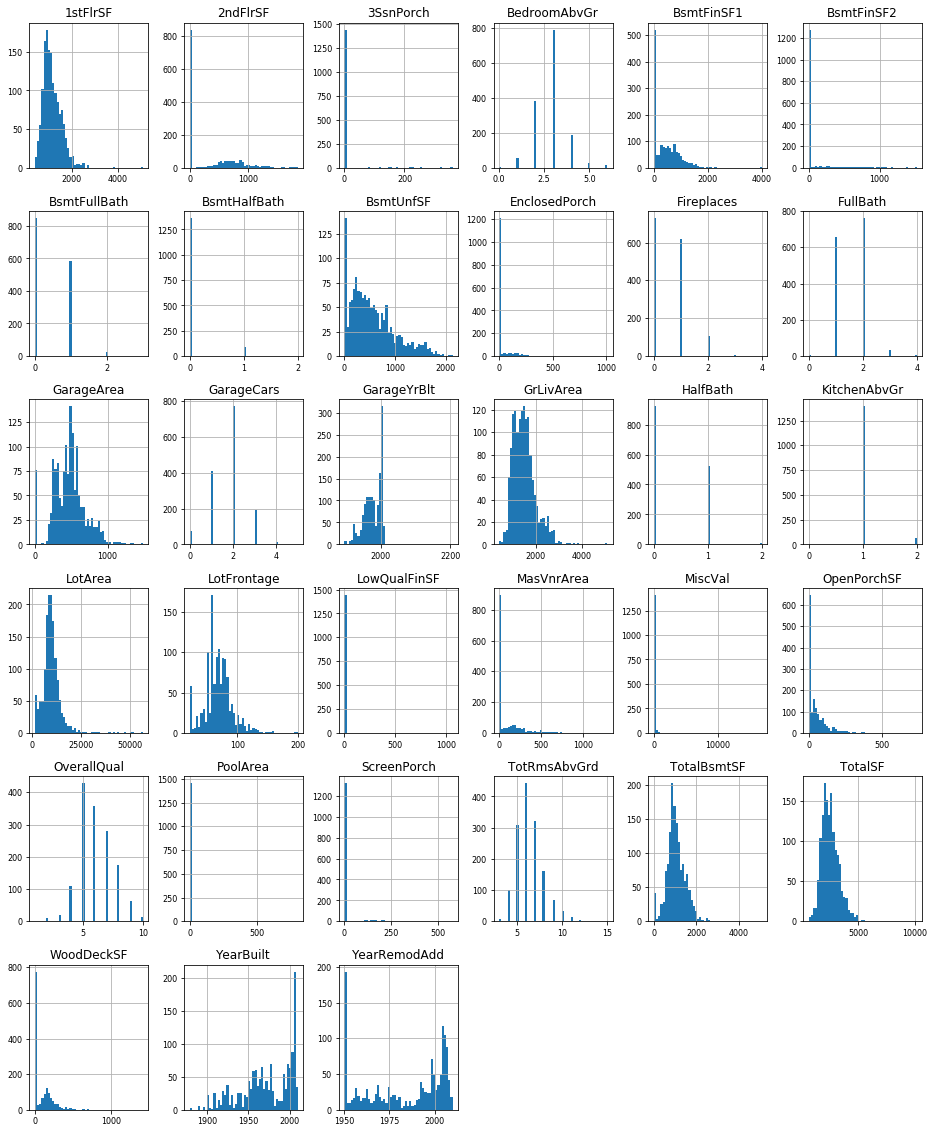

In [89]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [90]:
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
data_num_skew = data_num_skew[data_num_skew > .75]

# applying log + 1 transformation for all numeric features with skewnes over .75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  


In [91]:
# Listing of variables has skewness more than 0.75
data_num_skew

LotArea           3.112013
MasVnrArea        2.530744
BsmtFinSF1        1.164477
BsmtFinSF2        4.037186
BsmtUnfSF         0.918970
TotalBsmtSF       0.812752
1stFlrSF          1.556592
2ndFlrSF          0.911944
LowQualFinSF     16.150628
GrLivArea         1.129240
BsmtHalfBath      3.775974
KitchenAbvGr      4.074860
TotRmsAbvGrd      0.841731
Fireplaces        0.819015
WoodDeckSF        2.128569
OpenPorchSF       2.685015
EnclosedPorch     4.664371
3SsnPorch        12.511336
ScreenPorch       3.784349
PoolArea         20.176117
MiscVal          20.054543
TotalSF           1.213557
dtype: float64

In [92]:
#Mean Normalization
data_num = ((data_num - data_num.mean())/(data_num.max() - data_num.min()))
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1.232000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.444000e+03,1.458000e+03,1.458000e+03,1.458000e+03,1.458000e+03,...,1.458000e+03,1.458000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.458000e+03
mean,2.828782e-17,3.341631e-15,-1.179469e-17,-1.383023e-17,7.285315e-16,-1.789504e-16,-6.279080e-16,-7.106417e-17,1.698525e-15,4.128785e-16,...,1.713307e-19,-2.466210e-17,4.937411e-16,2.682341e-18,8.882165e-17,3.207158e-17,-4.546664e-18,-2.933514e-17,3.539359e-17,-1.970170e-15
std,1.250103e-01,1.375151e-01,1.596457e-01,2.319853e-01,3.521744e-01,3.655543e-01,3.581584e-01,2.608502e-01,2.451225e-01,1.412637e-01,...,1.551890e-01,1.458660e-01,3.565299e-01,3.262215e-01,2.621208e-01,8.388601e-02,2.380899e-01,5.681071e-02,1.288006e-01,1.110517e-01
min,-2.658121e-01,-4.890725e-01,-5.643135e-01,-7.050212e-01,-5.610464e-01,-2.874924e-01,-5.090002e-01,-9.644596e-02,-7.309773e-01,-7.867304e-01,...,-3.532236e-01,-3.177210e-01,-3.362905e-01,-3.566173e-01,-1.180367e-01,-7.930620e-03,-7.735078e-02,-3.632792e-03,-2.423545e-02,-4.875190e-01
25%,-5.910814e-02,-4.676603e-02,-1.198690e-01,-1.401357e-01,-3.443797e-01,-2.874924e-01,-5.090002e-01,-9.644596e-02,-2.752945e-02,-5.858895e-03,...,-1.532236e-01,-1.040113e-01,-3.362905e-01,-3.566173e-01,-1.180367e-01,-7.930620e-03,-7.735078e-02,-3.632792e-03,-2.423545e-02,-6.905165e-02
50%,-8.828811e-03,1.907118e-02,-8.757901e-03,1.253604e-02,1.389536e-01,-2.874924e-01,1.975627e-01,-9.644596e-02,6.878480e-02,2.120353e-02,...,4.677641e-02,4.859636e-03,-3.362905e-01,1.527535e-01,-1.180367e-01,-7.930620e-03,-7.735078e-02,-3.632792e-03,-2.423545e-02,2.460687e-03
75%,6.379689e-02,7.475338e-02,1.023532e-01,2.262765e-01,3.389536e-01,4.253127e-01,2.896273e-01,-9.644596e-02,1.404562e-01,5.377408e-02,...,4.677641e-02,6.937577e-02,3.701196e-01,2.924005e-01,-1.180367e-01,-7.930620e-03,-7.735078e-02,-3.632792e-03,-2.423545e-02,7.468853e-02
max,7.341879e-01,5.109275e-01,4.356865e-01,2.949788e-01,4.389536e-01,7.125076e-01,4.909998e-01,9.035540e-01,2.690227e-01,2.132696e-01,...,6.467764e-01,6.822790e-01,6.637095e-01,6.433827e-01,8.819633e-01,9.920694e-01,9.226492e-01,9.963672e-01,9.757645e-01,5.124810e-01


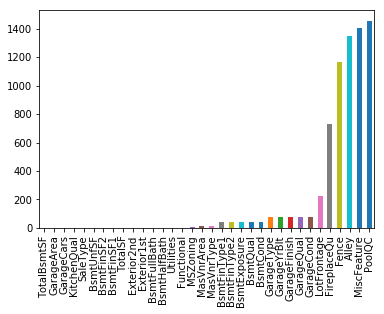

In [93]:
# Dealing Missing Data

# first we'll visualize null count in overall dataframe
null_in_HousePrice = data.isnull().sum()
null_in_HousePrice = null_in_HousePrice[null_in_HousePrice > 0]
null_in_HousePrice.sort_values(inplace=True)
null_in_HousePrice.plot.bar()

In [94]:
# Printing total numbers and percentage of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)


,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageFinish,78,0.053461
GarageYrBlt,78,0.053461
GarageCond,78,0.053461
GarageQual,78,0.053461


In [95]:
# Numerical Columns
data_len = data_num.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 260:
        #print("droping column: {}".format(col))
        data_num = data_num.drop(col, axis = 1)
    # if there is less than 260 missing values than fill in with median valu of column
    else:
        #print("filling missing values with median in column: {}".format(col))
        data_num = data_num.fillna(data_num[col].median())

In [96]:
# Categorical Columns
data_len = data_cat.shape[0]

# check what is percentage of missing values in categorical dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 50:
        print("droping column: {}".format(col))
        data_cat.drop(col, axis = 1)
    # if there is less than 50 missing values than fill in with median valu of column
    else:
        #print("filling missing values with XXX: {}".format(col))
        #data_cat = data_cat.fillna('XXX')
        pass

droping column: Alley
droping column: FireplaceQu
droping column: GarageType
droping column: GarageFinish
droping column: GarageQual
droping column: GarageCond
droping column: PoolQC
droping column: Fence
droping column: MiscFeature


In [97]:
# Dummy Coding for Categorical Variables

# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [99]:
# using concat function we merging two dataframe for furthere analysis
newdata1 = pd.concat([data_num, data_cat_dummies], axis=1)

In [100]:
# Constant Model 
df_constant1 = sm.add_constant(newdata1)

In [120]:
lasso.predict(df_constant1)

array([12.06480093, 11.99913311, 12.06480093, ..., 12.06480093,
       11.99913311, 12.06480093])

The above predicted values are best because the score between train and validate is same that means variance and bias is optimised i.e no over or underfiting. The score is also pretty high compared to other other model